In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.express as px
import missingno as msno

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
data_path = "/content/Churn_Modelling.csv"
ds_name = 'customer Churn'

In [ ]:
df = pd.read_csv(data_path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
def ds_shape(df, ds_name='df'):
    print(f"The {ds_name} dataset has {df.shape[0]} rows and {df.shape[1]}")

ds_shape(df, ds_name)

The customer Churn dataset has 10000 rows and 14


In [ ]:
def ds_info(df, ds_name='df'):
    print(f"The {ds_name} dataset info:\n")
    print(df.info())

ds_info(df, ds_name)

The customer Churn dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [ ]:
df.describe().T.style.set_properties(**{"background-color": "#FBA7A7", "font-size" : "17px",
                                        "color": "#ffffff", "border-radius" : "1px", "border": "1.5px solid black"})

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000000,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
CustomerId,10000.000000,15690940.569400,71936.186123,15565701.000000,15628528.250000,15690738.000000,15753233.750000,15815690.000000
CreditScore,10000.000000,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
Age,10000.000000,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,10000.000000,5.012800,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,10000.000000,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
NumOfProducts,10000.000000,1.530200,0.581654,1.000000,1.000000,1.000000,2.000000,4.000000
HasCrCard,10000.000000,0.705500,0.455840,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,10000.000000,0.515100,0.499797,0.000000,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,10000.000000,100090.239881,57510.492818,11.580000,51002.110000,100193.915000,149388.247500,199992.480000


In [ ]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
def check_null(df, ds_name='df'):
    print(f"Null Values in each col in the {ds_name} dataset:\n")
    print(df.isnull().sum())

check_null(df, ds_name)

Null Values in each col in the customer Churn dataset:

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


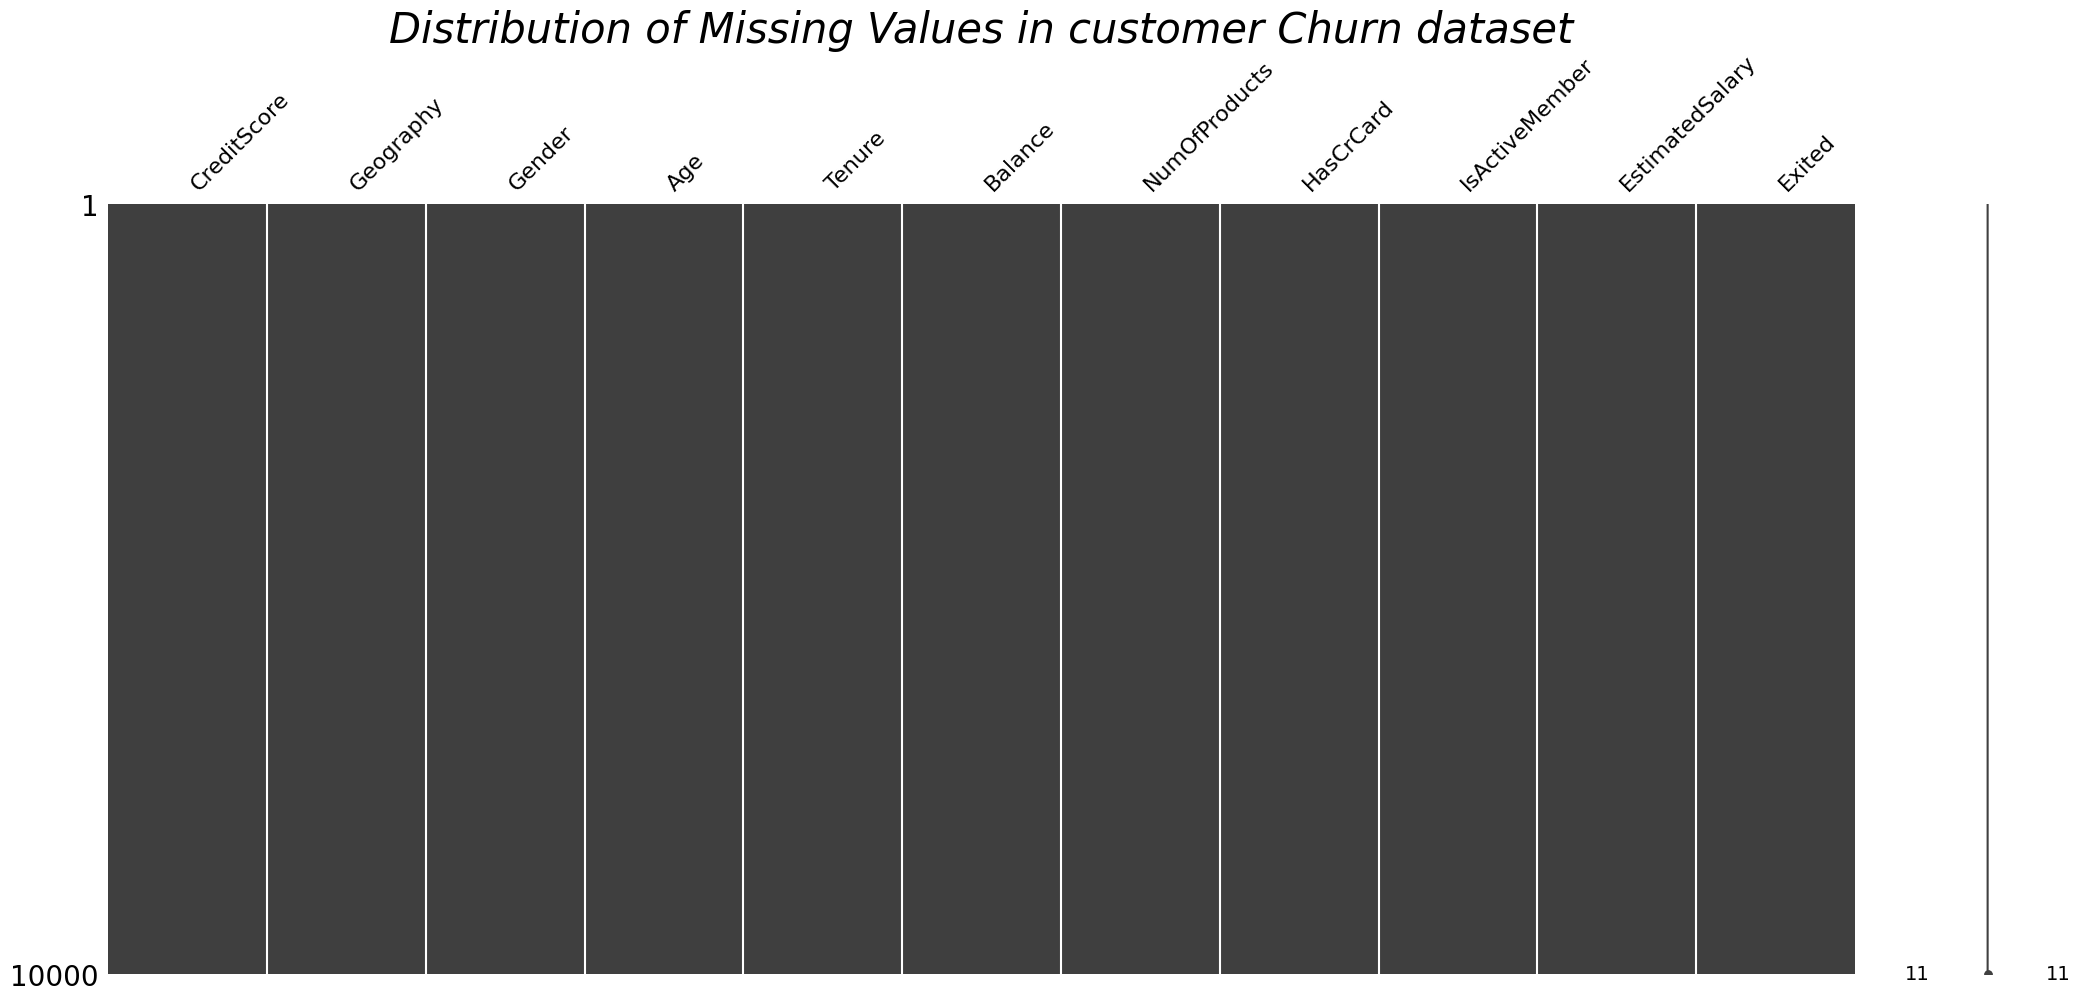

In [ ]:
def plot_miss_vals(df, ds_name="df"):
    msno.matrix(df)
    plt.title(f'Distribution of Missing Values in {ds_name} dataset', fontsize=30, fontstyle='oblique')
    plt.show()

plot_miss_vals(df, ds_name)

In [ ]:
def uni_vals(df, ds_name='df'):
    print(f"The number of unique values in each column in {ds_name} dataset:\n")
    print(df.nunique())

uni_vals(df, ds_name)

The number of unique values in each column in customer Churn dataset:

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64


In [ ]:
len(df.nunique())

11

In [ ]:
df.nunique().index[0]

'CreditScore'

In [ ]:
cat_features = []
cont_features = []
looping = len(df.nunique())

for i in range(looping):

    if df.nunique().values[i] <= 25:
        cat_features.append(df.nunique().index[i])
    else:
        cont_features.append(df.nunique().index[i])

In [ ]:
print(f"Categorical Features are: {cat_features}\n")
print(f"Continous Features are: {cont_features}")

Categorical Features are: ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

Continous Features are: ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']


In [ ]:
def cat_summary_with_graph(dataframe, col_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])

    fig.add_trace(go.Bar(y=dataframe[col_name].value_counts().values.tolist(),
                         x=[str(i) for i in dataframe[col_name].value_counts().index],
                         text=dataframe[col_name].value_counts().values.tolist(),
                         textfont=dict(size=15),
                         name=col_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=colors,
                                     line=dict(color='#DBE6EC',
                                               width=1))),
                  row=1, col=1)

    fig.add_trace(go.Pie(labels=dataframe[col_name].value_counts().keys(),
                         values=dataframe[col_name].value_counts().values,
                         textfont=dict(size=20),
                         textposition='auto',
                         showlegend=False,
                         name=col_name,
                         marker=dict(colors=colors)),
                  row=1, col=2)

    fig.update_layout(title={'text': col_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)


colors = ['#494BD3', '#E28AE2', '#F1F481', '#79DB80', '#DF5F5F',
              '#69DADE', '#C2E37D', '#E26580', '#D39F49', '#B96FE3']

In [ ]:
for cat_feature in cat_features:
    cat_summary_with_graph(df, cat_feature)


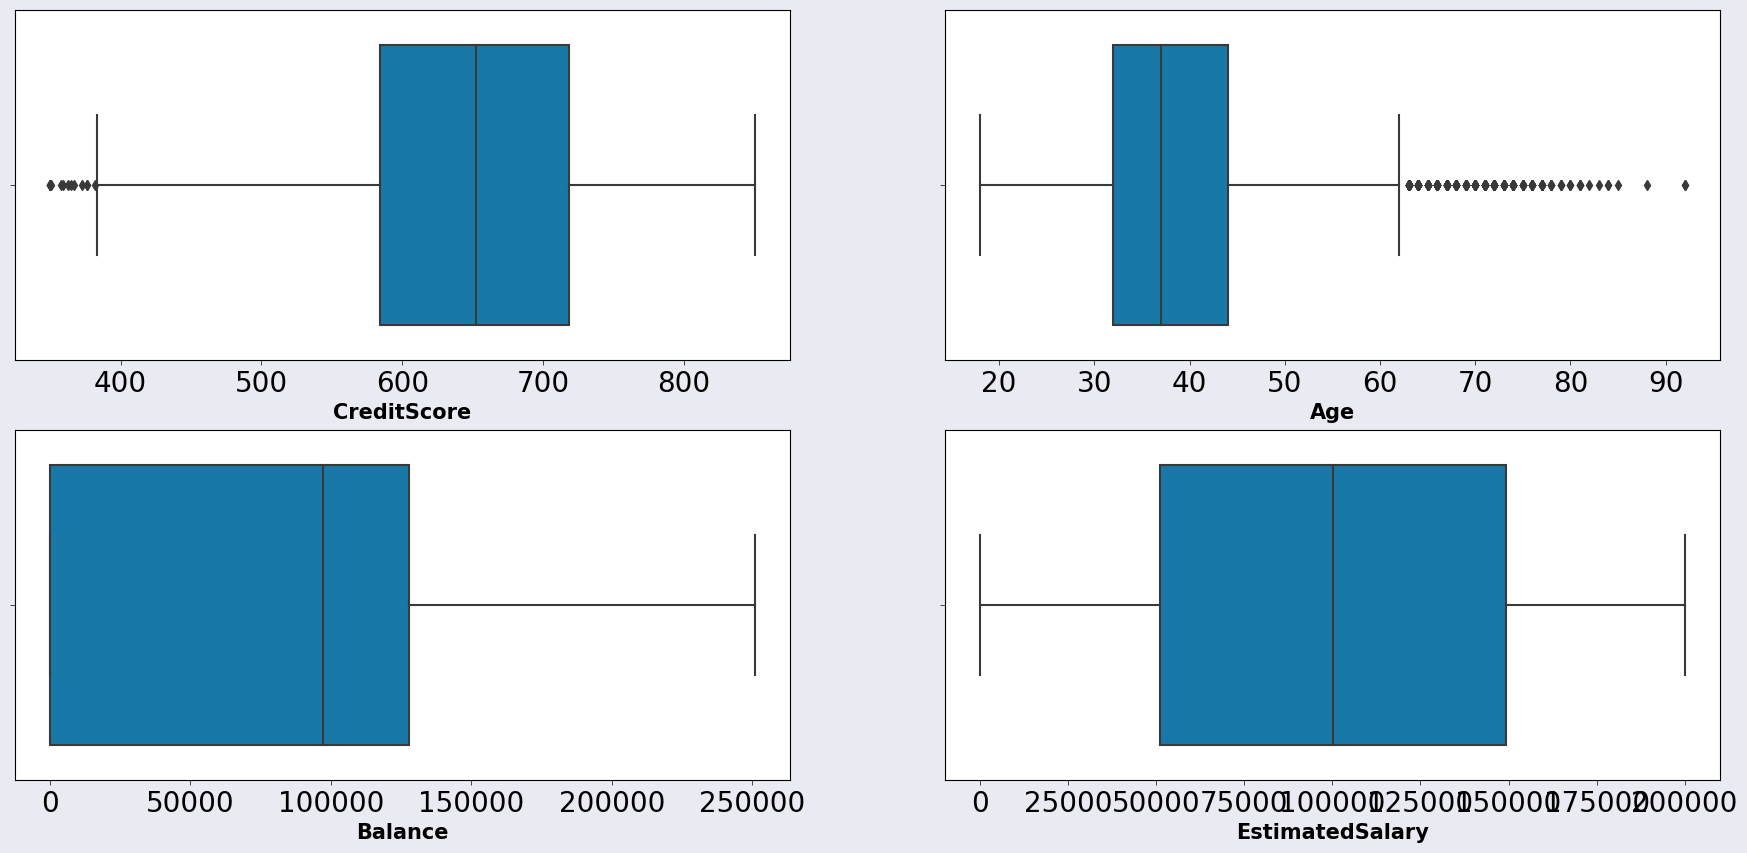

In [ ]:
ncols = 2
nrows = 2

fig, axes = plt.subplots(nrows, ncols, figsize=(22, 10), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = cont_features[r*ncols+c]
        sns.boxplot(x=df[col], ax=axes[r, c], palette='winter')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=15, fontweight='bold')
        axes[r, c].tick_params(labelsize=20, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
plt.show()

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


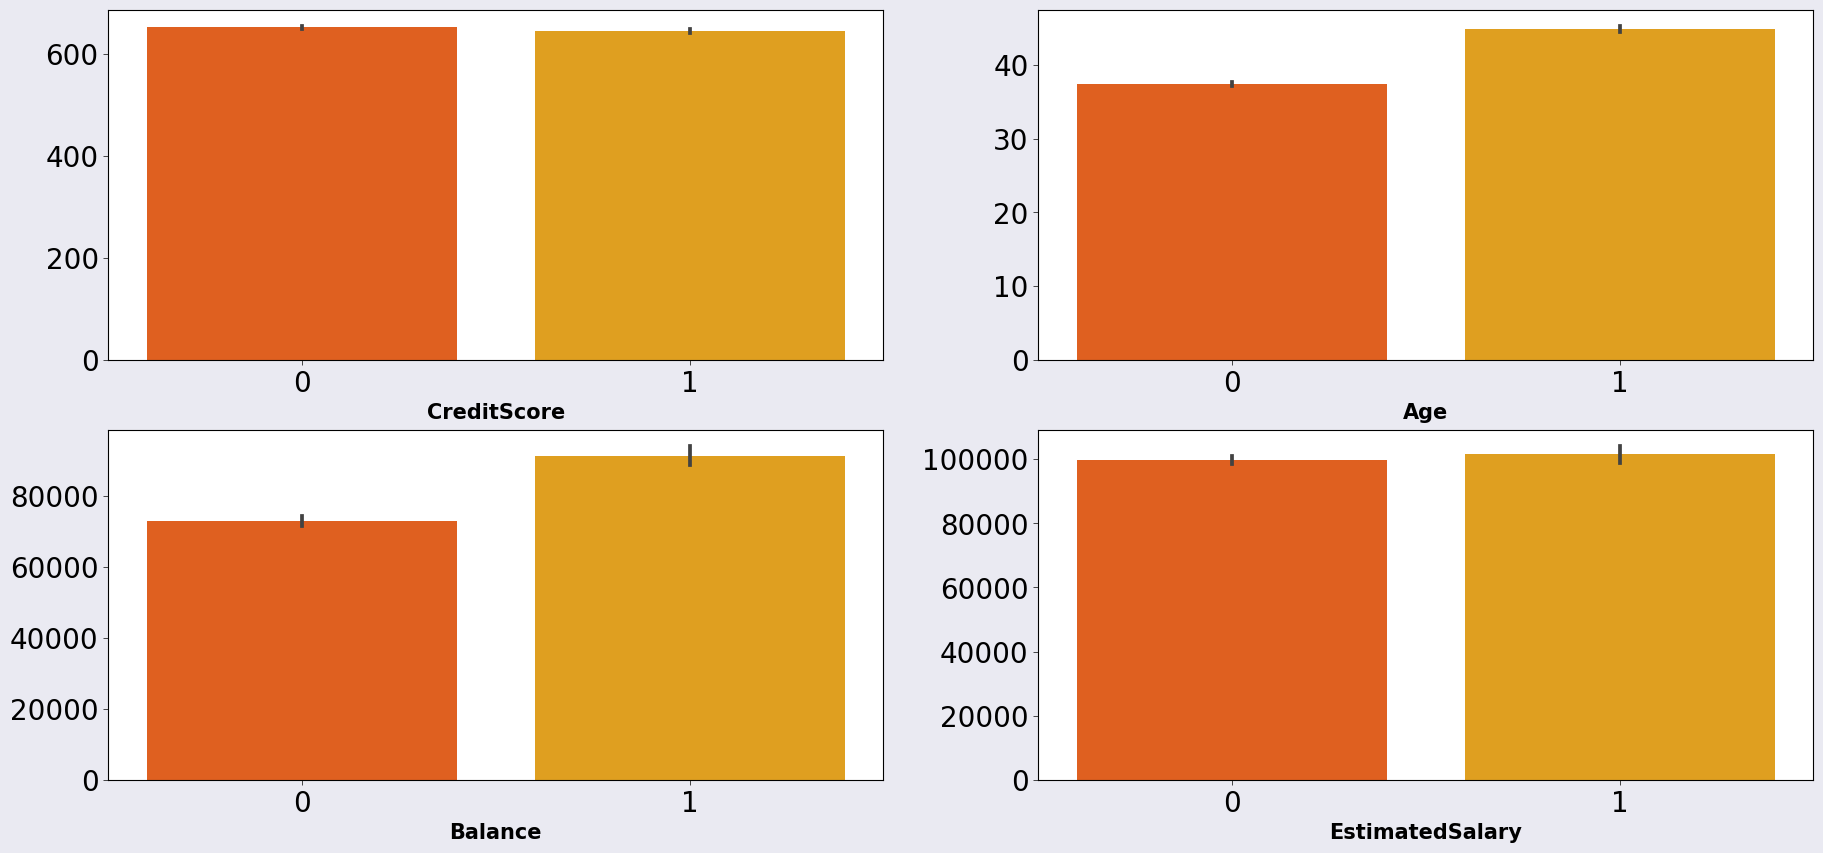

In [ ]:
ncols = 2
nrows = 2

fig, axes = plt.subplots(nrows, ncols, figsize=(22, 10), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = cont_features[r*ncols+c]
        sns.barplot(y=df[col], x=df['Exited'], ax=axes[r, c], palette='autumn', label='Train data')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=15, fontweight='bold')
        axes[r, c].tick_params(labelsize=20, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
plt.show()

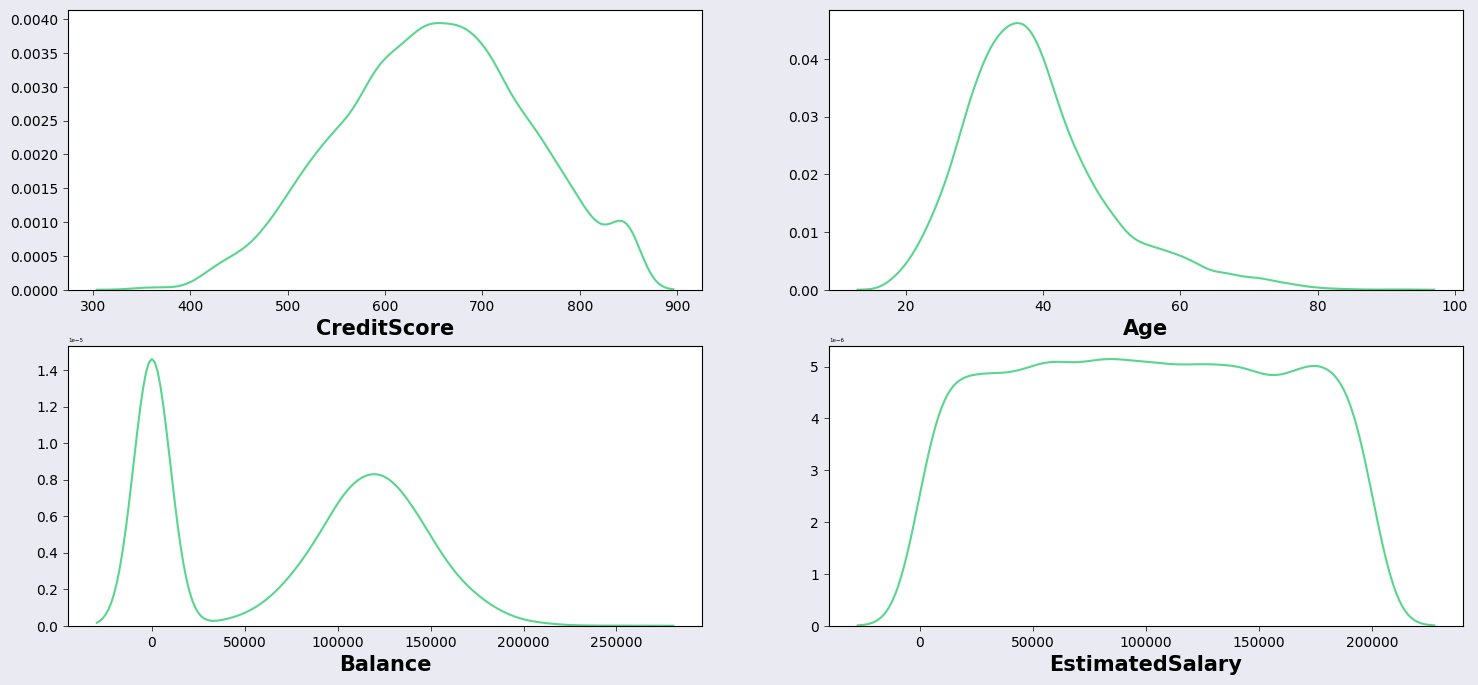

In [ ]:
ncols = 2
nrows = 2

fig, axes = plt.subplots(nrows, ncols, figsize=(18, 8), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = cont_features[r*ncols+c]
        sns.kdeplot(x=df[col], ax=axes[r, c], color='#58D68D', label='Train data')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=15, fontweight='bold')
        axes[r, c].tick_params(labelsize=10, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
plt.show()

In [ ]:
df= pd.get_dummies(df, columns= ['Geography', 'Gender'], drop_first=True, dtype=np.int8)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


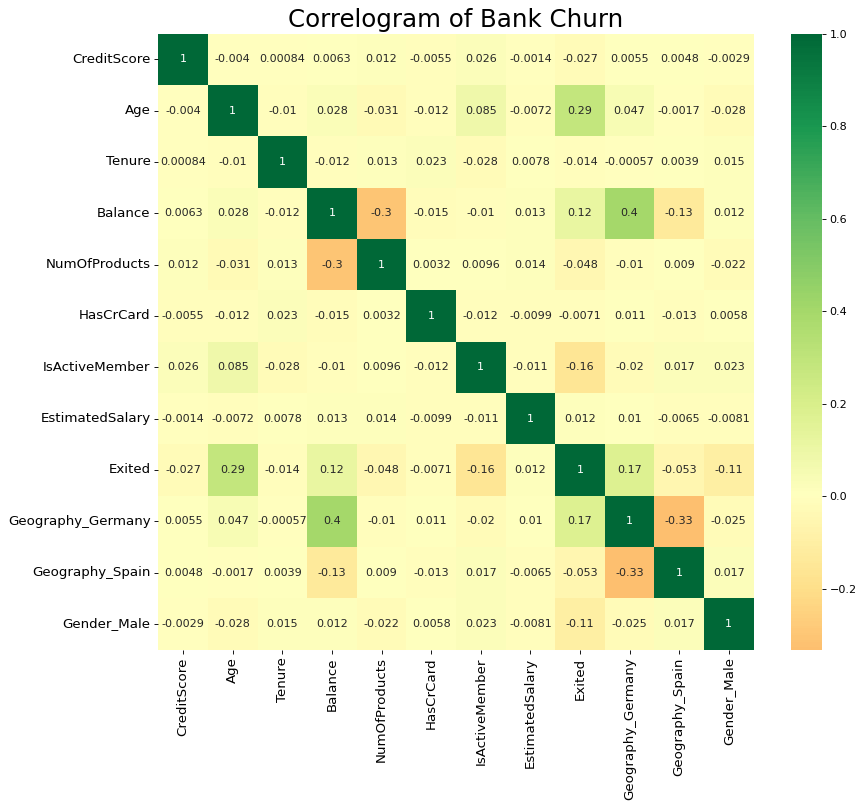

In [ ]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of Bank Churn', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [ ]:
X = df.drop('Exited', axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
y = df['Exited']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=123,test_size=0.2,shuffle=True)

In [ ]:
print(f"Training dataset has {X_train.shape[0]} Examples")
print(f"Testing dataset has {X_test.shape[0]} Examples")

Training dataset has 8000 Examples
Testing dataset has 2000 Examples


In [ ]:
scaler = StandardScaler()
features = list(X_train.columns)

for col in features:
    X_train[col] = scaler.fit_transform(X_train[col].to_numpy().reshape(-1,1))
    X_test[col] = scaler.transform(X_test[col].to_numpy().reshape(-1,1))

In [ ]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9385,0.382227,0.487923,1.033751,0.308125,0.825039,0.645897,0.973355,-1.712869,1.740172,-0.574271,0.908195
2155,0.101876,-0.379067,0.341382,0.394675,-0.914174,0.645897,-1.027375,-1.409809,-0.574656,-0.574271,-1.101086
768,0.351077,0.198926,-1.043358,0.699392,0.825039,-1.548234,-1.027375,0.349622,-0.574656,1.741338,0.908195
6082,0.776796,0.102594,1.033751,0.448857,-0.914174,0.645897,-1.027375,-0.664364,1.740172,-0.574271,0.908195
2926,-1.455629,2.318235,1.033751,-1.220239,0.825039,0.645897,0.973355,0.262719,-0.574656,-0.574271,0.908195


In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_predictions = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

print(f"The Accuarcy of KNN {knn_accuracy*100:.2f}%")

The Accuarcy of KNN 82.00%


In [ ]:
svm_classifier = SVC(C=2.0,kernel='rbf')
svm_classifier.fit(X_train, y_train)

SVC(C=2.0)

In [ ]:
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print(f"The Accuarcy of SVM {svm_accuracy*100:.2f}%")

The Accuarcy of SVM 86.00%


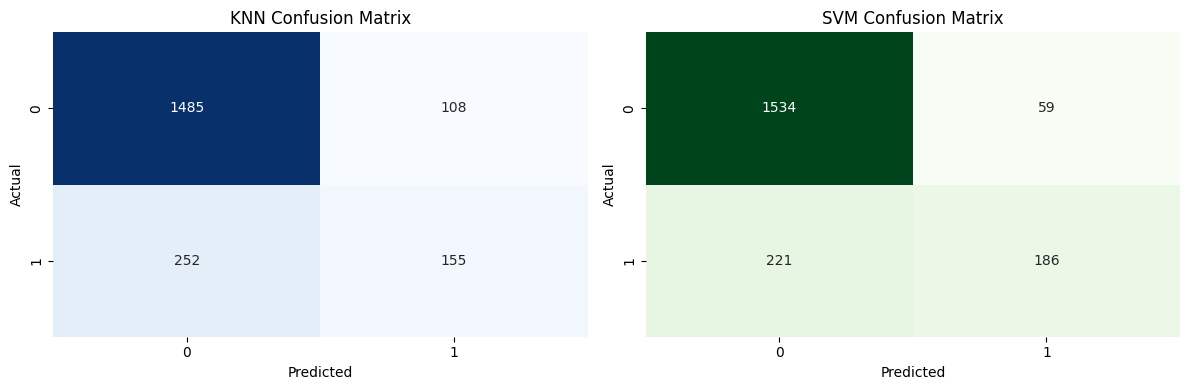

In [ ]:
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)

# Plot confusion matrices
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(knn_conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(svm_conf_matrix, annot=True, cmap='Greens', fmt='d', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

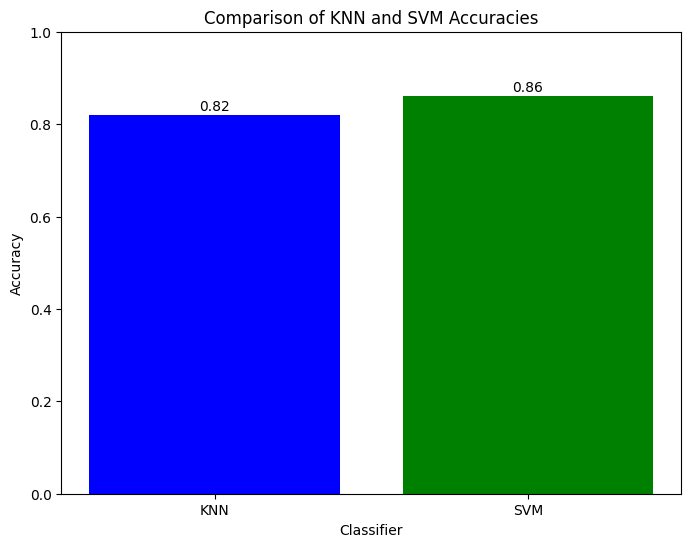

In [ ]:
classifiers = ['KNN', 'SVM']
accuracies = [knn_accuracy, svm_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(classifiers, accuracies, color=['blue', 'green'])
plt.title('Comparison of KNN and SVM Accuracies')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Setting y-axis limit for better visualization
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center')

plt.show()

In [ ]:
def prediction_fun(cs, age, tenure, balance, num_of_products, has_card, am, es, geo, gender, cols):
    geo_spain = 0
    geo_germany = 0
    gender_male = 0

    if geo == 'Germany':
        geo_germany = 1
    elif geo == 'Spain':
        geo_spain = 1

    if gender == 'Male':
        gender_male = 1

    data_points = pd.DataFrame(columns = cols)
    vals = [cs, age, tenure, balance, num_of_products, has_card, am, es, geo_germany, geo_spain, gender_male]
    data_points.loc[len(data_points.index)] = vals

    scaler = StandardScaler()
    features = list(X_train.columns)

    for col in features:
        data_points[col] = scaler.fit_transform(data_points[col].to_numpy().reshape(-1,1))

    predict = svm_classifier.predict(data_points)[0]

    if predict == 0:

        print("This Customer is more likely to Stay")

    else:

        print("This Customer is more likely to exit the bank")

In [ ]:
cs = 815
age = 39
tenure = 6
balance = 0
num_of_products= 1
has_card = 1
am = 1
es = 85167.88
geo = 'Spain'
gender = 'Female'
cols = X_train.columns
prediction_fun(cs, age, tenure, balance, num_of_products, has_card, am, es, geo, gender, cols)

This Customer is more likely to Stay


logistic regression & ensemble methods classifier to train the model

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [ ]:

log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=log.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8125

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
precision_score(y_test,y_pred)

0.5987654320987654

In [ ]:
recall_score(y_test,y_pred)

0.23832923832923833

In [ ]:
f1_score(y_test,y_pred)

0.3409490333919156

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_res,y_res=SMOTE().fit_resample(X,y)

In [ ]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=123,test_size=0.2,shuffle=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_pred1=LR.predict(X_test)
accuracy_score(y_test,y_pred1)

0.793

In [ ]:
precision_score(y_test,y_pred1)

0.44776119402985076

In [ ]:
recall_score(y_test,y_pred1)

0.07371007371007371

In [ ]:
f1_score(y_test,y_pred1)

0.12658227848101267

In [ ]:
# SVC
from sklearn import svm
SVC=svm.SVC()

In [ ]:
SVC.fit(X_train,y_train)


SVC()

In [ ]:
y_pred2=SVC.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred2)

0.7965

In [ ]:
precision_score(y_test,y_pred2)

0.0

In [ ]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred3=DT.predict(X_test)
accuracy_score(y_test,y_pred3)

0.7925

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF=RandomForestClassifier()

In [ ]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred4=RF.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred4)

0.868

In [ ]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GBC=GradientBoostingClassifier()

In [ ]:
GBC.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred5=GBC.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred5)

0.87

In [ ]:
final_data=pd.DataFrame({"Models":["LR","SVC","DT","RF","GBC"],"ACC":[accuracy_score(y_test,y_pred1)
                                                                      accuracy_score(y_test,y_pred2)
                                                                      accuracy_score(y_test,y_pred3)
                                                                      accuracy_score(y_test,y_pred4)
                                                                      accuracy_score(y_test,y_pred5)]})



SyntaxError: ignored

In [ ]:
final_data

NameError: ignored

In [ ]:
# Save the model
x_res=sc.fit_transform(X_res)

In [ ]:
RF.fit(X_res,y_res)

RandomForestClassifier()

In [ ]:
import joblib

In [ ]:
joblib.dump(RF,'Churn_Modeling')

['Churn_Modeling']

In [ ]:
model=joblib.load('Churn_Modeling')

In [ ]:
model.predict([[730,22,2,0,0,0,0,204317.88,1,1,0]])

array([0])